***Total: 42 points***

Complete this homework by writing R code to complete the following tasks. Keep in mind:

i. Empty chunks have been included where code is required
ii. For Problem 2e, you should include a image (screen shot), which can be loaded into R
iii. This homework requires use of data files:

  - `BRCA.genome_wide_snp_6_broad_Level_3_scna.seg` (Problems 1, 2)
  - `GIAB_highconf_v.3.3.2.vcf.gz` (Problem 3)
  
iv. You will be graded on your code and output results (knitted .html file). The assignment is worth 42 points total; partial credit can be awarded.

This assignment is due on **Dec 1, 2022**. 

For additional resources, please refer to these links:  
Problems 1 & 2:  
  - https://www.bioconductor.org/packages/devel/bioc/vignettes/plyranges/inst/doc/an-introduction.html
  - https://bioconductor.org/packages/release/bioc/vignettes/GenomicRanges/inst/doc/GenomicRangesIntroduction.html  
Problem 3:  
  - https://bioconductor.org/packages/release/bioc/vignettes/Rsamtools/inst/doc/Rsamtools-Overview.pdf  
Problem 4: 
  - https://bioconductor.org/packages/release/bioc/vignettes/VariantAnnotation/inst/doc/VariantAnnotation.pdf  

# Problem 1: Overlaps between genomic regions and copy number alterations. (14 points total)

### Preparation
Load copy number segment results as shown in *2.1 BED format* of *Lecture16_GenomicData.Rmd*. You will use the same file as in the lecture notes, `BRCA.genome_wide_snp_6_broad_Level_3_scna.seg`. Here is code to get you started.

In [71]:
#load packages
suppressPackageStartupMessages({
    library(tidyverse)
    library(GenomicRanges)
    library(plyranges)
    library(VariantAnnotation)
    library(Rsamtools)
})

In [3]:
#old wdir
getwd()

#new wdir
data_dir = '/workspaces/tfcb_2022/homeworks/homework07'
setwd(data_dir)
getwd()

[1] "/workspaces/tfcb_2022/homeworks/homework07"

[1] "/workspaces/tfcb_2022/homeworks/homework07"

In [4]:
list.files()

[1] "BRCA.genome_wide_snp_6_broad_Level_3_scna.seg"
[2] "GIAB_highconf_v.3.3.2.vcf.gz"                 
[3] "Homework07.ipynb"                             
[4] "homework07.Rmd"                               
[5] "README.md"

In [5]:
segs <- read.delim("BRCA.genome_wide_snp_6_broad_Level_3_scna.seg", as.is = TRUE)
mode(segs$Chromosome) <- "character" 
segs[segs$Chromosome == 23, "Chromosome"] <- "X"
segs.gr <- as(segs, "GRanges")

### a. Find the segments in `segs.gr` that have *any* overlap with the region `chr8:128,746,347-128,755,810` (4 points)
Print out the first five unique TCGA IDs.

In [24]:
seqinfo <- Seqinfo(genome = "hg19") #define seqinfo to be our reference genome
seqinfo <- keepStandardChromosomes(seqinfo) #trim down dataset to just standard chromosome info
seqlevelsStyle(seqinfo) <- "NCBI" #format our genome into NCBI nomenclature
ch8.tiles.subset <- GRanges(seqnames = "8",ranges=IRanges(start=128746347,end=128755810)) #create a tile on chromosome 8 of the defined range
ch8.segs.overlap <- find_overlaps(segs.gr, ch8.tiles.subset)  # find overlaps between segs.gr (our sequence window) and the tile we created in the line above
ch8.segs.overlap[1:5] # show first 5 segments from segs.gr that overlapped ch8.segs.overlap

Warning message in (function (seqlevels, genome, new_style) :
“cannot switch some of hg19's seqlevels from UCSC to NCBI style”


GRanges object with 5 ranges and 3 metadata columns:
      seqnames             ranges strand |                 Sample Num_Probes
         <Rle>          <IRanges>  <Rle> |            <character>  <integer>
  [1]        8 40440599-145232496      * | TCGA-3C-AAAU-10A-01D..      58252
  [2]        8 87789846-145232496      * | TCGA-3C-AAAU-01A-11D..      34156
  [3]        8   617667-145232496      * | TCGA-3C-AALI-10A-01D..      81529
  [4]        8 62096568-145232496      * | TCGA-3C-AALI-01A-11D..      48514
  [5]        8 82383848-145232496      * | TCGA-3C-AALJ-10A-01D..      36769
      Segment_Mean
         <numeric>
  [1]      -0.0018
  [2]       0.2819
  [3]       0.0010
  [4]       0.3373
  [5]      -0.0023
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

### b. Find the mean of the `Segment_Mean` values for copy number segments that have *any* overlap with the region chr17:37,842,337-37,886,915. (4 points)

In [25]:
ch17.tiles.subset <- GRanges(seqnames = "17",ranges=IRanges(start=37842337,end=37886915)) #create the desired tile on chromosome 17
ch17.segs.overlap <- find_overlaps(segs.gr, ch17.tiles.subset)  #compare created tile against reference genome
ch17.segs.overlap %>%
    as_tibble() #convert output to tibble
    mean(ch17.segs.overlap$Segment_Mean) #calculate the mean of the segment means column of the output tibble.

seqnames,start,end,width,strand,Sample,Num_Probes,Segment_Mean
<fct>,<int>,<int>,<int>,<fct>,<chr>,<int>,<dbl>
17,987221,73296953,72309733,*,TCGA-3C-AAAU-10A-01D-A41E-01,33859,0.0088
17,25270517,73296953,48026437,*,TCGA-3C-AAAU-01A-11D-A41E-01,24226,0.1856
17,987221,80917016,79929796,*,TCGA-3C-AALI-10A-01D-A41E-01,36977,0.0057
17,37341549,38148341,806793,*,TCGA-3C-AALI-01A-11D-A41E-01,369,2.4574
17,987221,65395076,64407856,*,TCGA-3C-AALJ-10A-01D-A41E-01,29192,0.0067
17,35391467,40360643,4969177,*,TCGA-3C-AALJ-01A-31D-A41E-01,2305,0.6738
17,987221,80917016,79929796,*,TCGA-3C-AALK-10A-01D-A41E-01,36985,0.0023
17,35977638,38287088,2309451,*,TCGA-3C-AALK-01A-11D-A41E-01,982,1.2955
17,987221,80917016,79929796,*,TCGA-4H-AAAK-10A-01D-A41E-01,36988,-0.0021


[1] 0.1420197

### c. Find the patient sample distribution of copy number for `PIK3CA` (hg19). (6 points)
Find the counts of samples with deletion (D; `Segment_Mean < -0.3`), neutral (N; `Segment_Mean >= -0.3 & Segment_Mean <= 0.3`), gain (G; `Segment_Mean > 0.3`) segments that have `any` overlap with `PIK3CA` gene coordinates.  


In [45]:
ch3.tiles.subset <- GRanges(seqnames = "3",ranges=IRanges(start=179148126,end=179240093)) #from https://www.ncbi.nlm.nih.gov/gene/5290
ch3.segs.overlap <- find_overlaps(segs.gr, ch3.tiles.subset) #finding overlaps between tile we created above for PIK3CA and reference genome
deletion <- as_tibble(ch3.segs.overlap) %>% #each of these triplets of code convert the output from above as a tibble, then filter the resulting tibble by segment mean size before spitting out the number of remaining rows after filtering, thus giving the number of reads of a given size.
    filter(Segment_Mean < -0.3)
    nrow(deletion)
neutral <- as_tibble(ch3.segs.overlap) %>%
    filter(Segment_Mean >= -0.3 & Segment_Mean <= 0.3)
    nrow(neutral)
gain <- as_tibble(ch3.segs.overlap) %>%
    filter(Segment_Mean > 0.3)
    nrow(gain)



[1] 14

[1] 2024

[1] 165

The number of reads characterized as a deletion is 14. The number of reads characterized as neutral is 2024. The number of reads characterized as a gain is 165.

# Problem 2: Frequency of copy number alteration events within genomic regions. (12 points total) 

This problem will continue to use the copy number data stored in `segs.gr`.

### a. Create a genome-wide tile of 1Mb windows for the human genome (`hg19`). (4 points)
See *3.1 Tiling the genome* of *Lecture16_GenomicData.Rmd* for hints.


In [38]:
slen <- seqlengths(seqinfo) # get the length of the chromosomes
tileWidth <- 1000000 # tile size of 1Mb
tiles <- tileGenome(seqlengths = slen, tilewidth = tileWidth, #cut up the chromosome into tiles 1Mb in size
                    cut.last.tile.in.chrom = TRUE)
tiles

GRanges object with 3114 ranges and 0 metadata columns:
         seqnames            ranges strand
            <Rle>         <IRanges>  <Rle>
     [1]        1         1-1000000      *
     [2]        1   1000001-2000000      *
     [3]        1   2000001-3000000      *
     [4]        1   3000001-4000000      *
     [5]        1   4000001-5000000      *
     ...      ...               ...    ...
  [3110]        Y 56000001-57000000      *
  [3111]        Y 57000001-58000000      *
  [3112]        Y 58000001-59000000      *
  [3113]        Y 59000001-59373566      *
  [3114]     chrM           1-16571      *
  -------
  seqinfo: 25 sequences from an unspecified genome

### b. Find the 1Mb window with the most frequent overlapping deletions. (4 points)
Find the 1Mb windows with `any` overlap with deletion copy number segments. Assume a deletion segment is defined as a segment in `segs.gr` having `Segment_Mean < -0.3`. 

Return one of the 1Mb window `Granges` entry with the highest frequency (count) of deletion segments.

Hint: Subset the `segs.gr` to only rows with `Segment_Mean < -0.3`. 

In [61]:
deletion.subset <- segs.gr %>% #this chunk of code creates a new object where the segment means are all less than -0.3
    as_tibble() %>%
    filter(segs.gr$Segment_Mean < -0.3)
deletion.subset.gr <- GRanges(deletion.subset) #we then use the GRanges function on the object defined above
del.overlap <- find_overlaps(deletion.subset.gr, tiles) %>% #and then compare the tiles against the deletion subset, converting it to a data frame
    data.frame()
maxdel <-as.integer(tail(names(sort(table(del.overlap$seqnames))),1)) 
print(tiles[maxdel])


GRanges object with 1 range and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]        1 10000001-11000000      *
  -------
  seqinfo: 25 sequences from an unspecified genome


### c. Visually inspect the deletion overlap result from part (b) using IGV. (4 points)
Provide a screen shot of IGV at the 1Mb window with the most frequent overlap with deletion segments. The image should include the segments from `BRCA.genome_wide_snp_6_broad_Level_3_scna.seg` loaded. 

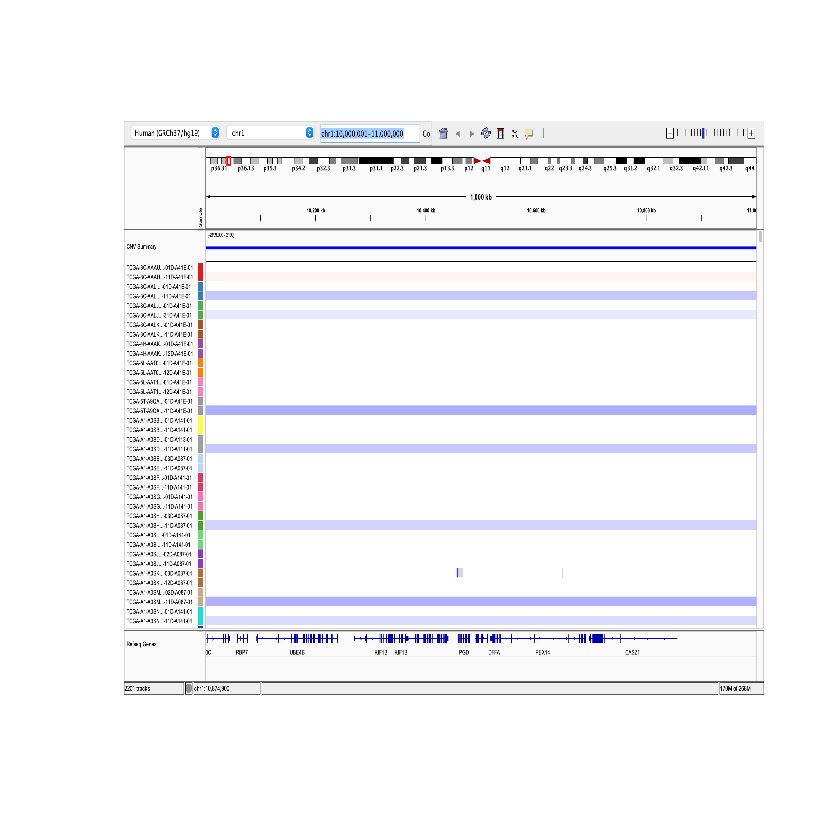

In [63]:
library(png) #install the necessary package
pp <- readPNG("myfile.png") #read in the saved screenshot from IGV
plot.new()
rasterImage(pp,0,0,1,1) #plot the above

# Problem 3: Reading and annotating genomic variants (16 points total)

### Preparation

In [62]:
vcfFile <- "GIAB_highconf_v.3.3.2.vcf.gz"

### a. Load variant data from VCF file `GIAB_highconf_v.3.3.2.vcf.gz` for `chr8:128,700,000-129,000,000`. (4 points)
Note: use genome build `hg19`.

In [77]:
vcfFile1 <- "GIAB_highconf_v.3.3.2.vcf.gz" #read in the appropriate data
vcfHead1 <- scanVcfHeader(vcfFile1) #pull out the header info from the read in data
myGRange1 <- GRanges(seqnames = "8", ranges = IRanges(start = 128700000, end = 129000000)) #create a tile of the desired length on chromosome 8
vcf.param1 <- ScanVcfParam(which = myGRange1) #Create a vcf parameter using our created tile
vcf1 <- readVcf(vcfFile1, genome = "hg19", param = vcf.param1) #plug it all in, denote the reference genome, data, and reading parameter.

### b. Combine the fields of the VCF genotype information into a table. (4 points)
You may use your choice of data objects (e.g. `data.frame`).

In [79]:
genoData <- data.frame(do.call(cbind, geno(vcf1))) #create a dataframe from our generated object from part a
colnames(genoData) <- rownames(geno(header(vcf1))) #redefine the rownames into column names
genoData #print our created table

,GT,DP,GQ,ADALL,AD,IGT,IPS,PS
,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>
rs6984323,1|1,765,583,"1, 332","0, 315",1/1,.,PATMAT
rs4478537,0|1,544,813,"103, 124","135, 172",0/1,.,PATMAT
rs34141920,0|1,523,222,"132, 121","132, 121",0/1,.,PATMAT
rs17772814,1|0,695,1503,"143, 158","196, 199",0/1,.,PATMAT
rs77977256,1|0,642,685,"154, 157","160, 166",0/1,.,PATMAT
8:128715845_AT/A,0|1,368,99,"66, 91","66, 91",0/1,.,PATMAT
rs143209301,1|0,581,595,"128, 128","151, 165",0/1,.,PATMAT
rs202231913,0|1,369,99,"81, 97","81, 97",0/1,.,PATMAT
rs16902340,0|1,689,1294,"144, 150","184, 204",0/1,.,PATMAT


### c. Retrieve the following information at chr8:128747953. (8 points)
Print out the SNP ID (i.e. "rs ID"), reference base (`REF`), alterate base (`ALT`), genotype (`GT`), depth (`DP`), allele depth (`ADALL`), phase set (`PS`).

Hints: 

  i. `REF` and `ALT` are in the output of `rowRanges(vcf)`. See Section `3a` in `Lecture16_VariantCalls.ipynb` 
  ii. To get the sequence of `DNAString`, use `as.character(x)`.  
  ii. To get the sequence of `DNAStringSet`, use `as.character(unlist(x))`. 
  iii. To expand a list of information for `geno`, use `unlist(x)`.  

  

In [90]:
SNPvcf <- GRanges(seqnames='8',ranges=IRanges(start=128747953,end=128747953)) #use GRanges to create tile on chromosome 8
SNPparam <- ScanVcfParam(which=SNPvcf) #Use the above tile to create a vcf parameter
newvcf = readVcf(vcfFile1, genome = "hg19", param = SNPparam) #as above, denote the data, reference genome, and reading parameter
newgenoData <- data.frame(do.call(cbind, geno(newvcf))) #create the data table as we did in part b of this problem (this line and next)
colnames(newgenoData) <- rownames(geno(header(newvcf)))
unlist(geno(newvcf)) #This expands the list of information for the geno function
rowRanges(newvcf) #read out

HG001   
GT.rs3824120    0|1     
DP.rs3824120    461     
GQ.rs3824120    668     
ADALL.rs3824120 105, 94 
AD.rs3824120    128, 121
IGT.rs3824120   0/1     
IPS.rs3824120   .       
PS.rs3824120    PATMAT

GRanges object with 1 range and 5 metadata columns:
            seqnames    ranges strand | paramRangeID            REF
               <Rle> <IRanges>  <Rle> |     <factor> <DNAStringSet>
  rs3824120        8 128747953      * |           NA              G
                           ALT      QUAL      FILTER
            <DNAStringSetList> <numeric> <character>
  rs3824120                  T        50        PASS
  -------
  seqinfo: 25 sequences from hg19 genome